# An Analysis of Alice in Wonderland

In this project I will use Python and the nltk and spacy libraries to carry out a textual analysis of Lewis Carroll's *Alice in Wonderland*. You will find my code below with inline commentary. I will be working from the text found [here](http://www.gutenberg.org/files/11/11-0.txt).


I will take the following steps:

1. Read in the external text file and convert to an nltk text
2. Find, plot, and discuss the four most common words in the text
3. Discuss how often adjectives appear on either side of Alice's name (and what those adjectives are)
4. Plot the occurrence of the most common adjectives throughout the text, and discuss whether they show anything about the state of Alice or the plot in the book
5. For fun, we will see what percentage of the text Alice's name accounts for

I begin by importing the libraries that will be necessary for this project

In [1]:
import nltk, re, pprint
import string
from nltk import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from urllib import request

### Read and Convert

We then read in the txt file from the web, set aside the leading and trailing Project Gutenburg information, and convert what results into an nltk text.

In [2]:
# attempt to read the file
url = 'http://www.gutenberg.org/files/11/11-0.txt'
try:
    response = request.urlopen(url)
    raw = response.read().decode('utf-8')
except:
    print("Error! Unable to read from address provided.")
    
# find the actual start and end of the text, cut off Project Gutenberg information
start = raw.find('CHAPTER I')
end = raw.rfind('THE END')

raw = raw[start:end]

# tokenize text, standardize to lowercase, and convert into nltk Text
tokens = word_tokenize(raw)
tokens = [token.lower() for token in tokens]
text = nltk.Text(tokens)

## Frequency Information

Now we look at the 4 most common words in the book and their distribution throughout the text.

In [3]:
fdist1 = FreqDist(text)
result1 = fdist1.most_common(4)
print(result1)

[(',', 2418), ('’', 1755), ('the', 1637), ('‘', 1115)]


The predominance of punctuation in this example is not particularly helpful to the current analysis, so I strip the punctuation from the original raw file, remake the nltk text, and run this again.

In [4]:
# strip the punctuation
punct_remove = string.punctuation + chr(8217) + chr(8216)
trans = str.maketrans('', '', punct_remove)
raw_stripped = raw.translate(trans)

# reconvert to tokens, restandardize, and remake nltk text
tokens_stripped = word_tokenize(raw_stripped)
tokens_stripped = [token.lower() for token in tokens_stripped]
text2 = nltk.Text(tokens_stripped)

# rerun the frequency distribution
fdist2 = FreqDist(text2)
result2 = fdist2.most_common(4)
print(result2)

[('the', 1630), ('and', 844), ('to', 721), ('a', 627)]


We now have the four most common words in *Alice in Wonderland*: 'the', 'and', 'to', and 'a'. Yet again, however, this information is not particularly useful, as it is completely populated by "stop words." To obtain a more meaningful analysis, let us strip the text of stop words and try again.

[('said', 462), ('alice', 385), ('little', 128), ('one', 101)]


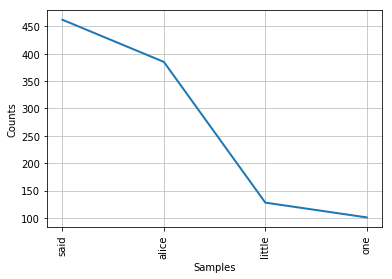

In [5]:
# remove stopwords
stop_words = set(stopwords.words("english"))
tokens_final = [token for token in tokens_stripped if token not in stop_words]
text3 = nltk.Text(tokens_final)

# final check on top 4 words
fdist3 = FreqDist(text3)
result3 = fdist3.most_common(4)
print(result3)

# plot these results
%matplotlib inline
fdist3.plot(4)

### Results

These results are somewhat more meaningful, though some of them may seem obvious. 

1. The presence of 'said' at the head of the list demonstrates the prevalance of dialogue in this text (and possibly a lack of variation in Carroll's vocabulary). This makes sense, given that before we stripped punctuation, single quotes (which the txt file uses as dialogue markers) accounted for two of the most common tokens.
2. The appearance of Alice's name next makes a great deal of sense, since she is the titular protagonist of the work.
3. We must look carefully at 'little' and 'one' in the coming sections. Are these simply common independently occurring words, or are they regularly used to describe Alice? We will find out in the next section.

Before moving on to further textual analysis, let us examine the dispersion plot for these words to see if they appear consistently throughout the work. For this plot we will use the text containing all tokens (including stop words and punctuation) to get a better sense of the full text's structure.

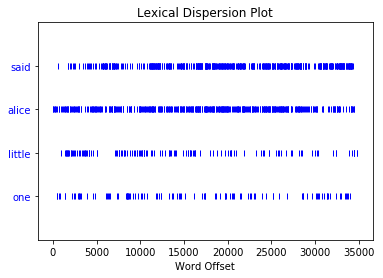

In [6]:
# create a list of the most common words
words = []
for item in result3:
    words.append(item[0])

# plot the occurrence of the words
%matplotlib inline
text.dispersion_plot(words)

These results are rather unsurprising. Each of the most common terms occurs relatively consistently over the course of the work. There are two possible exceptions: 'said' and 'little'. 'Said' appears to be slightly less common at the beginning of the work, though that may be explained by the presence of introductory exposition. The author's use of 'little' appears to diminish in the latter half of the book as well.

## Adjectives with Alice

I now turn my analysis to the occurrence of adjectives immediately before or after Alice's name in the text. For this task I will utilize part of speech tagging. I will therefore temporarily transition to using the spacy library, as I have found its automated part of speech tagging more accurate. This shift requires a small amount of preliminary work (loading the file into a spacy doc), which I will carry out now. I use the same original raw string as before.

In [7]:
# let spacy analyze the file
import spacy

nlp = spacy.load('en_core_web_md')
doc = nlp(raw)

# iterate through tokenized doc, load adjective-noun pairs as tuples (adj, 'Alice') or ('Alice', adj) into list
# record the locations where 'poor alice' found

alice_adj = []
indices_alice = []

for i in range(len(doc)):
    if doc[i].text == 'Alice':
        try:
            if doc[i-1].pos_ == 'ADJ':
                alice_adj.append((doc[i-1].text, 'Alice'))
                if doc[i-1].text == 'poor':
                    indices_alice.append(i)
            if doc[i+1].pos_ == 'ADJ':
                alice_adj.append(('Alice', doc[i+1].text))
                if doc[i+1].text == 'poor':
                    indices_alice.append(i)
        except KeyError:
            continue

print(alice_adj)
print("Occurences of 'Alice' and immediately preceding or following adjective:", len(alice_adj))
print("Unique combinations: ", len(set(alice_adj)))

[('poor', 'Alice'), ('little', 'Alice'), ('poor', 'Alice'), ('poor', 'Alice'), ('poor', 'Alice'), ('poor', 'Alice'), ('poor', 'Alice'), ('poor', 'Alice'), ('poor', 'Alice'), ('up,’', 'Alice'), ('on!’', 'Alice'), ('poor', 'Alice'), ('that', 'Alice'), ('round', 'Alice'), ('of?’', 'Alice'), ('little', 'Alice'), ('little', 'Alice')]
Occurences of 'Alice' and immediately preceding or following adjective: 17
Unique combinations:  7


Poor Alice! As we can see, she is described as "poor Alice" 9 times out of the 17 expressions which spacy logged. This accounts for roughly 52.9% of the results. Some of these tuples were obviously erroneously tagged, however. What happens if we remove them?

In [8]:
# iterate over the results and remove any that contain punctuation
for tup in alice_adj[:]:
    for char in tup[0]:
        if char in punct_remove:
            alice_adj.remove(tup)
            break
            
print(alice_adj)
print("New length of adj-Alice pairs: ", len(alice_adj))
print("New number of unique items: ", len(set(alice_adj)))
    

[('poor', 'Alice'), ('little', 'Alice'), ('poor', 'Alice'), ('poor', 'Alice'), ('poor', 'Alice'), ('poor', 'Alice'), ('poor', 'Alice'), ('poor', 'Alice'), ('poor', 'Alice'), ('poor', 'Alice'), ('that', 'Alice'), ('round', 'Alice'), ('little', 'Alice'), ('little', 'Alice')]
New length of adj-Alice pairs:  14
New number of unique items:  4


Removing the tuples containing punctuation breaks, we are left with 14 results, of which only 4 are unique! 'Poor Alice' now accounts for roughly 64.2% of our pairs. Note also that 'little Alice,' containing two of the 4 most frequent words (after stripping punctuation and stop words) takes up approximately 21.4% (3/14) of the results. These account for a very small proportion, however, of the 128 instances of 'little' noted in the overall frequency distribution displayed above.

### Alternative Method

To see more generally what adjectives surround 'Alice' in *Alice in Wonderland*, I here use the raw text file that has its punctuation stripped out. We will therefore see the *types* of descriptions occurring around her name, but cannot determine whether they are part of the same sentence are not.

In [9]:
doc2 = nlp(raw_stripped)

# iterate through tokenized doc, load adjective-noun pairs as tuples (adj, 'Alice') or ('Alice', adj) into list

alice_adj2 = []

for i in range(len(doc2)):
    if doc2[i].text == 'Alice':
        try:
            if doc2[i-1].pos_ == 'ADJ':
                alice_adj2.append((doc2[i-1].text, 'Alice'))
            if doc2[i+1].pos_ == 'ADJ':
                alice_adj2.append(('Alice', doc2[i+1].text))
        except KeyError:
            continue
            
# how many of these contain 'poor'?
poor_count = 0
for tup in alice_adj2:
    if 'poor' in tup[0] or 'poor' in tup[1]:
        poor_count += 1

print(alice_adj2)
print("Occurrences of poor:", poor_count)
print("Occurences of 'Alice' and immediately preceding or following adjective:", len(alice_adj2))
print("Unique occurrences: ", len(set(alice_adj2)))

[('poor', 'Alice'), ('little', 'Alice'), ('poor', 'Alice'), ('poor', 'Alice'), ('poor', 'Alice'), ('middle', 'Alice'), ('poor', 'Alice'), ('poor', 'Alice'), ('poor', 'Alice'), ('foolish', 'Alice'), ('different', 'Alice'), ('poor', 'Alice'), ('cried', 'Alice'), ('Alice', 'its'), ('poor', 'Alice'), ('red', 'Alice'), ('that', 'Alice'), ('better', 'Alice'), ('twelfth', 'Alice'), ('round', 'Alice'), ('Alice', 'its'), ('Alice', 'whose'), ('kind', 'Alice'), ('little', 'Alice'), ('little', 'Alice')]
Occurrences of poor: 9
Occurences of 'Alice' and immediately preceding or following adjective: 25
Unique occurrences:  14


After allowing the inclusion of adjectives across punctuation breaks, our list increases in length to 25. Some new adjectives have appeared, such as 'middle,' 'foolish,' and 'different.' 'Poor Alice' accounts for 36% of this list - still a sizeable amount. It would seem that she suffers many misfortunes in the work.

## Analysis of 'Poor'

Since 'poor' is used so regularly to describe Alice, examining its use in the text may reveal further insights. I will begin by seeing what proportion of the total number of appearances of the word 'poor' in the text occur in 'poor Alice.' I will then plot the occurrences of 'poor' throughout the text, to see if it displays anything about the mood of the current action. For these actions I return to the nltk library.

In [10]:
# calculate the total number of occurrences of 'poor', see what proportion 'poor Alice' represents

prop = round((poor_count / text2.count('poor') * 100), 3)
print(str(prop) + "% occurrences of 'poor' contain 'poor Alice.'")

# count how often Alice appears with 'poor'
prop2 = round((poor_count / text2.count('alice') * 100), 3)
print(str(prop2) + "% appearances of 'Alice' in 'poor Alice.'")

33.333% occurrences of 'poor' contain 'poor Alice.'
2.338% appearances of 'Alice' in 'poor Alice.'


'Poor Alice' accounts for a full third of the occurrences of 'poor' in the text. 

Looking at it from the other direction, of all occurrences of Alice's name in the text, a low but measurable 2.338% of them occur in the phrase 'poor Alice' - roughly 1 in 43. As noted above, however, 'poor Alice' accounts for a much higher percentage (52.9% or 64.2%, depending on the method of calculation) of the occurrences of 'Alice' with an adjective immediately preceding or following it.


### Dispersion of 'Poor'

We now know that the adjective 'poor' is strongly associated with Alice, so let us see where in the text the word appears.

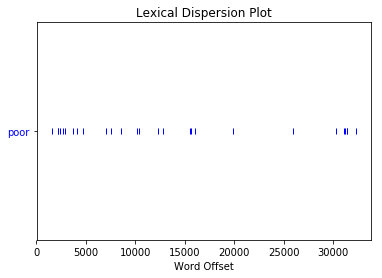

In [11]:
%matplotlib inline
text.dispersion_plot(['poor'])   

It would appear that the misfortunes requiring the use of the adjective 'poor' cluster somewhat in the text. Let us see where specifically "poor alice" falls.

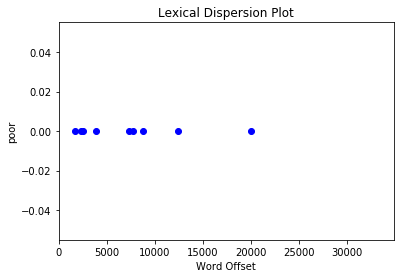

In [12]:
import pylab as plt

# make a custom plot to show locations of 'poor Alice'
y_vals = []
y_vals = [0 for n in range(len(indices_alice))]
plt.figure(1)
plt.clf()
plt.title('Lexical Dispersion Plot')
plt.xlabel('Word Offset')
plt.ylabel('poor')
plt.xlim(0, len(doc))
plt.plot(indices_alice, y_vals, 'bo')
plt.show()


It would appear that Alice is only "poor Alice" during the first two-thirds of the work, with the vast majority of the appearances in the first quarter, clustered on two occassions. It would seem that either Carroll's vocabulary changes, or Alice's situation improves markedly over the course of the work.

## Final Analyses and Conclusion

Before ending my textual analysis of Lewis Carroll's *Alice in Wonderland*, I have a few brief points of analysis I would like to touch on. First, I thought it would be fun to see how much of the text is taken up by Alice's name. I calculate this using the nltk text with punctuation tokens removed (text2).

In [13]:
alice_prop = round(100 * text2.count('alice') / len(text2), 3)
print("'Alice' accounts for " + str(alice_prop) + "% of the words in the text.")

'Alice' accounts for 1.453% of the words in the text.


References to Alice's name account for 1.453% of the text, or roughly one in 70 words. Finally, let us look at words which nltk identifies as occupying contexts similar to the two most common adjectives associated with Alice: poor and little.

In [14]:
text.similar('poor', 9)
text.similar('little', 9)

to do thought said other wise cried sharp unfortunate
next great mouse bit long garden while fan duchess


While I will not analyze each of these words, I will provide a few observations. 

The presence of terms such as sharp, cried, and unfortunate in the list of words sharing contexts with 'poor' makes sense, since they can denote negative experiences or events. 'Said' is most likely included because, just like 'poor,' it is regularly paired with Alice (when beginning or ending dialogue).

Many other approaches could be taken to an analysis of this text, but I end my examination here.